# MLflow Model Grid Search Analysis Notebook

This notebook provides a workflow for analyzing the results of a grid search experiment tracked in MLflow. The main steps are:

1. **Configuration**: Set the `grid_id`, `experiment_name`, and (optionally) `param_set` to specify which MLflow runs to analyze.

2. **Data Retrieval**: Pull all relevant runs from MLflow using the provided identifiers. The resulting DataFrame (`df`) contains run metadata, hyperparameters, and key performance metrics.

3. **Filtering**: Use the `filter_runs` function to select runs that meet specific metric thresholds (e.g., minimum CF ≤ 1 cm, maximum RMSE, etc.). The filtered results are stored in `filtered_df`.

4. **Exploration & Visualization**:
    - Display top and bottom runs by any metric (e.g., RMSE, CF ≤ 2 cm).
    - Visualize how RMSE and CF ≤ 2 cm vary with different hyperparameters (e.g., number of hidden layers, window sizes).
    - Analyze the effect of hidden neuron count on performance metrics.

5. **Interpretation**: Use the summary tables and plots to identify the best-performing hyperparameter combinations and gain insights into model behavior.

**Variables in use**:
- `df`: All runs matching the grid search criteria.
- `filtered_df`: Runs filtered by metric thresholds.
- `top15rmse_df`, `top15cf_df`: Top 15 runs by RMSE and CF ≤ 2 cm, respectively.

**Requirements**:  
- MLflow tracking server access  
- Python packages: pandas, numpy, matplotlib, seaborn, mlflow

**Usage**:  
Modify the configuration section as needed, then run the notebook cells sequentially to analyze your experiment results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlflow
from mlflow.tracking import MlflowClient
from datetime import datetime
import os
from IPython.display import Image, display
import seaborn as sns

In [2]:
os.environ['MLFLOW_TRACKING_URI'] = 'https://cbi-chatbot.tamucc.edu/mlflow'

In [3]:
# Only variables you need to change
# Input the grid ID, experiment name, and parameter set name
# This will pull all runs from the model and plot the performance metrics
# The model must be registered in MLflow
# Change to None if you want to pull more runs

grid_id = "b7f857e4"  # Replace with your grid ID
experiment_name = "experiment_EAGLEP_MORGAN"  # Replace with your experiment name
param_set = None # Replace with your parameter set name

In [4]:


def get_runs_by_grid_and_paramset(grid_id, param_set, experiment_name, max_results=1000):

    client = MlflowClient()

    #experiment = client.get_experiment_by_name(experiment_name)
    #if experiment is None:
    #    raise ValueError(f"Experiment '{experiment_name}' not found.")
    #experiment_id = experiment.experiment_id

    ## Build filter string based on inputs
    #filter_string = f"tags.grid_id = '{grid_id}'"
    #if param_set is not None:
    #    filter_string += f" AND tags.param_set_id = '{param_set}'"

    # Search
    runs = client.search_runs(
        experiment_ids=[str(n) for n in range(17,23)],
        #filter_string=filter_string,
        max_results=5000,
    )

    run_data = []
    for run in runs:
        run_data.append({
            "run_id": run.info.run_id,
            "grid_id": run.data.tags.get("grid_id"),
            "param_set": run.data.tags.get("param_set_id"),
            "metric_cf_1cm": run.data.metrics.get("central_frequency_percentage_1cm"),
            "metric_cf_2cm": run.data.metrics.get("central_frequency_percentage_2cm"),
            "metric_cf_5cm": run.data.metrics.get("central_frequency_percentage_5cm"),
            "metric_cf_15cm": run.data.metrics.get("central_frequency_percentage_15cm"),
            "metric_rmse": run.data.metrics.get("root_mean_squared_error"),
            "metric_val_loss": run.data.metrics.get("final_val_loss"),
            "user": run.data.tags.get("mlflow.user"),
            "params_epochs": run.data.params.get("epochs"),
            "params_batch_size": run.data.params.get("batch_size"),
            "params_restored_epoch": run.data.metrics.get("restored_epoch"),
            "params_hidden_layers": run.data.params.get("hidden_layers"),
            "params_activation": run.data.params.get("activation_function"),
            "params_hidden_neurons": run.data.params.get("hidden_neurons"),
            "params_dropout_rate": run.data.params.get("dropout_rate"),
            "params_learning_rate": run.data.params.get("learning_rate"),
            "params_wind_past_window": run.data.params.get('input_feature__wind_past_window_size'),
            "params_wl_future_window": run.data.params.get('input_feature__wl_future_window_size'),
            "params_wl_past_window": run.data.params.get('input_feature__wl_past_window_size'),
        })

    return pd.DataFrame(run_data)

df = get_runs_by_grid_and_paramset(
    grid_id=grid_id,
    experiment_name=experiment_name,
    param_set= param_set)

display(df)

run_id   grid_id param_set  metric_cf_1cm  \
0     b348a68f08d44afc990794eec2d67fae  8264dba0  fb994a77      21.631964   
1     add78bddf8ef4fa0bdcb123352036fdd  8264dba0  fb994a77      17.734188   
2     215ea4468c564ecc98867866deb368aa  8264dba0  fb994a77      15.493427   
3     16dbf5d18572492392509fb4194fd98b  8264dba0  7bcaafc6      20.932825   
4     9b2ced068dfc4b5686efb7879160c5b4  8264dba0  7bcaafc6      28.329465   
...                                ...       ...       ...            ...   
4995  661b57ed935d482c86fc8d1e6cab8496  5e6a10ed  1b0c1eaf       1.588983   
4996  ff1ee15caf8a46a1a2d7cc8ad2cb40c5  5e6a10ed  e6f04b82       1.313559   
4997  80f7e60ea9e74595aac4d00d600673c5  b56266b1  6f2d7a8a            NaN   
4998  54e1b1f442584088a6d72984324b372e  b56266b1  48ea0bb4            NaN   
4999  693b1d27720c480ebbcbad11704e37cd  b56266b1  6f2d7a8a            NaN   

      metric_cf_2cm  metric_cf_5cm  metric_cf_15cm  metric_rmse  \
0         40.743933      69.992186       92.666391     0.070292   
1         33.959597      65.412990       92.657198     0.072422   
2         30.382423      70.796562       99.689741     0.047887   
3         39.034312      67.410889       88.790706     0.079023   
4         49.518535      70.725990       99.543814     0.055018   
...             ...            ...             ...          ...   
4995       2.966102       9.322034       25.911017     0.465150   
4996       2.754237       6.631356       20.656780     0.467266   
4997            NaN            NaN             NaN          NaN   
4998            NaN            NaN             NaN          NaN   
4999            NaN            NaN             NaN          NaN   

      metric_val_loss      user  ... params_batch_size params_restored_epoch  \
0            0.004432  Nevarias  ...            100000                   NaN   
1            0.004833  Nevarias  ...            100000                   NaN   
2            0.006239  Nevarias  ...            100000                   NaN   
3            0.005106  Nevarias  ...            100000                   NaN   
4            0.007406  Nevarias  ...            100000                   NaN   
...               ...       ...  ...               ...                   ...   
4995         0.414871      axie  ...              None                   NaN   
4996         0.372676      axie  ...              None                   NaN   
4997              NaN    jduff3  ...                64                   NaN   
4998              NaN    jduff3  ...                64                   NaN   
4999              NaN    jduff3  ...                64                   NaN   

      params_hidden_layers params_activation params_hidden_neurons  \
0                        1        leaky_relu                    32   
1                        1        leaky_relu                    32   
2                        1        leaky_relu                    32   
3                        1        leaky_relu                    32   
4                        1        leaky_relu                    32   
...                    ...               ...                   ...   
4995                     1        leaky_relu                    64   
4996                     1        leaky_relu                    64   
4997                     1        leaky_relu                  [16]   
4998                     1        leaky_relu                  [16]   
4999                     1        leaky_relu                  [16]   

     params_dropout_rate params_learning_rate params_wind_past_window  \
0                   0.02                0.001                       2   
1                   0.02                0.001                       2   
2                   0.02                0.001                       2   
3                   0.02                0.001                       1   
4                   0.02                0.001                       1   
...                  ...                  ...                 

In [57]:
client = MlflowClient()
runs = client.search_runs(
    experiment_ids=[str(n) for n in range(17,23)],
    max_results=100,
)

In [60]:
client.search_experiments()[0]

<Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1753717104331, experiment_id='22', last_update_time=1753717104331, lifecycle_stage='active', name='experiment_MORGAN_EAGLEP', tags={}>

In [58]:
runs

[<Run: data=<RunData: metrics={'loss': 0.13904926180839539,
  'val_loss': 0.18579454720020294,
  'validation_loss': 0.18579454720020294}, params={'activation_function': 'leaky_relu',
  'baseline': 'None',
  'batch_size': '4000',
  'class_weight': 'None',
  'data_path_testing': 'data/model_inputs/PTARTH_TEXASP/feature_grid/featureset_32/test',
  'data_path_training': 'data/model_inputs/PTARTH_TEXASP/feature_grid/featureset_32/train',
  'data_path_validation': 'data/model_inputs/PTARTH_TEXASP/feature_grid/featureset_32/validate',
  'dropout_rate': '0.02',
  'early_stopping_patience': '50',
  'epochs': '500',
  'hidden_layers': '1',
  'hidden_neurons': '64',
  'initial_epoch': '0',
  'input_feature__do_hourly_average_on_wind': 'False',
  'input_feature__end_dates': "['2024-02-04 00:00:00', '2014-10-14 00:00:00', "
                              "'2011-01-23 00:00:00']",
  'input_feature__num_features': '260',
  'input_feature__start_dates': "['2023-02-09 00:00:00', '2013-10-19 00:00:00', "

In [5]:
def convert_col(s: pd.Series) -> pd.Series:
    try:
        return pd.to_numeric(s)
    except Exception:
        return s

In [6]:
converted_df = df.dropna(subset=['metric_cf_1cm']).query("not params_hidden_neurons.str.contains('\\\\[')").apply(convert_col).convert_dtypes()
converted_df

run_id   grid_id param_set  metric_cf_1cm  \
0     b348a68f08d44afc990794eec2d67fae  8264dba0  fb994a77      21.631964   
1     add78bddf8ef4fa0bdcb123352036fdd  8264dba0  fb994a77      17.734188   
2     215ea4468c564ecc98867866deb368aa  8264dba0  fb994a77      15.493427   
3     16dbf5d18572492392509fb4194fd98b  8264dba0  7bcaafc6      20.932825   
4     9b2ced068dfc4b5686efb7879160c5b4  8264dba0  7bcaafc6      28.329465   
...                                ...       ...       ...            ...   
4992  5160cfacc99d432db4cf3f457b920c95  5e6a10ed  9f7ed0eb       4.316547   
4993  5ab103161bdd4a5db27bea2347056445  5e6a10ed  882b7435       8.633094   
4994  65868ca2002b46ad8b74a98582bc273e  5e6a10ed  be6b30d5       1.666667   
4995  661b57ed935d482c86fc8d1e6cab8496  5e6a10ed  1b0c1eaf       1.588983   
4996  ff1ee15caf8a46a1a2d7cc8ad2cb40c5  5e6a10ed  e6f04b82       1.313559   

      metric_cf_2cm  metric_cf_5cm  metric_cf_15cm  metric_rmse  \
0         40.743933      69.992186       92.666391     0.070292   
1         33.959597       65.41299       92.657198     0.072422   
2         30.382423      70.796562       99.689741     0.047887   
3         39.034312      67.410889       88.790706     0.079023   
4         49.518535       70.72599       99.543814     0.055018   
...             ...            ...             ...          ...   
4992      10.071942      17.266187       58.273381     0.156796   
4993      17.266187      29.496403       62.589928      0.14915   
4994       6.428571      13.333333       36.666667     0.240142   
4995       2.966102       9.322034       25.911017      0.46515   
4996       2.754237       6.631356        20.65678     0.467266   

      metric_val_loss      user  ...  params_batch_size params_restored_epoch  \
0            0.004432  Nevarias  ...             100000                  <NA>   
1            0.004833  Nevarias  ...             100000                  <NA>   
2            0.006239  Nevarias  ...             100000                  <NA>   
3            0.005106  Nevarias  ...             100000                  <NA>   
4            0.007406  Nevarias  ...             100000                  <NA>   
...               ...       ...  ...                ...                   ...   
4992          0.03736      axie  ...               None                  <NA>   
4993         0.036039      axie  ...               None                  <NA>   
4994         0.086596      axie  ...               None                  <NA>   
4995         0.414871      axie  ...               None                  <NA>   
4996         0.372676      axie  ...               None                  <NA>   

      params_hidden_layers  params_activation params_hidden_neurons  \
0                        1         leaky_relu                    32   
1                        1         leaky_relu                    32   
2                        1         leaky_relu                    32   
3                        1         leaky_relu                    32   
4                        1         leaky_relu                    32   
...                    ...                ...                   ...   
4992                     1         leaky_relu                    64   
4993                     1         leaky_relu                    64   
4994                     1         leaky_relu                    64   
4995                     1         leaky_relu                    64   
4996                     1         leaky_relu                    64   

      params_dropout_rate  params_learning_rate  params_wind_past_window  \
0                    0.02                 0.001                        2   
1                    0.02                 0.001                        2   
2                    0.02                 0.001                        2   
3                    0.02                 0.001                        1   
4                    0.02                 0.001                        1   
...                 

In [7]:
import plotly.express as px
import re
import plotly.graph_objects as go
import plotly.subplots

In [8]:
def facet_fix_xaxes(plot, log_axes=set(), variable_name=None):
    if variable_name is None:
        scatter_titles = {t.yaxis: re.sub(r'.*params_(?P<param>.+?)(<br>.+|$)', r'\g<param>', t.hovertemplate)
                        for t in plot.data if type(t).__name__ in ['Scatter', 'Scattergl']}
        hist_titles = {t.yaxis: re.sub(r'.*params_(?P<param>.+?)(<br>.+|$)', r'\g<param>', t.hovertemplate)
                    for t in plot.data if type(t).__name__ == 'Histogram'}
        #plot.update_xaxes(matches=None)
        for anchor, title in scatter_titles.items():
            if title in log_axes:
                plot.update_xaxes(selector=dict(anchor=anchor), title_text=title, type='log', matches=None)
            else:
                plot.update_xaxes(selector=dict(anchor=anchor), title_text=title, matches=None)
            plot.update_annotations(selector=dict(text=f'param=params_{title}'), text='')
        for anchor, title in hist_titles.items():
            #plot.update_xaxes(selector=dict(anchor=anchor), title_text='', type=('log' if title in log_axes else 'linear'))
            if title in log_axes:
                plot.update_xaxes(selector=dict(anchor=anchor), title_text='', matches=None)
            else:
                plot.update_xaxes(selector=dict(anchor=anchor), title_text='', matches=None)
            plot.update_yaxes(selector=dict(anchor=anchor.replace('y','x')), matches=None)
            for dat in plot.data:
                if dat.yaxis == anchor and title in log_axes:
                    old_x = dat.x
                    try:
                        dat.x = np.log10(np.array(dat.x).astype(np.float64))
                    except Exception as e:
                        print('current dat.x:',dat.x)
                        print('old dat.x:', old_x)
                        print(type(old_x))
                        print(old_x.dtype)
                        raise e
        return plot
    else:
        scatter_titles = {t.yaxis: re.sub(f'.*{variable_name}(?P<param>.+?)(<br>.+|$)', r'\g<param>', t.hovertemplate)
                        for t in plot.data if type(t).__name__ in ['Scatter', 'Scattergl']}
        hist_titles = {t.yaxis: re.sub(f'.*{variable_name}(?P<param>.+?)(<br>.+|$)', r'\g<param>', t.hovertemplate)
                    for t in plot.data if type(t).__name__ == 'Histogram'}
        #plot.update_xaxes(matches=None)
        for anchor, title in scatter_titles.items():
            if title in log_axes:
                plot.update_xaxes(selector=dict(anchor=anchor), title_text=title, type='log', matches=None)
            else:
                plot.update_xaxes(selector=dict(anchor=anchor), title_text=title, matches=None)
            plot.update_annotations(selector=dict(text=f'{variable_name}{title}'), text='')
        for anchor, title in hist_titles.items():
            #plot.update_xaxes(selector=dict(anchor=anchor), title_text='', type=('log' if title in log_axes else 'linear'))
            if title in log_axes:
                plot.update_xaxes(selector=dict(anchor=anchor), title_text='', matches=None)
            else:
                plot.update_xaxes(selector=dict(anchor=anchor), title_text='', matches=None)
            plot.update_yaxes(selector=dict(anchor=anchor.replace('y','x')), matches=None)
            for dat in plot.data:
                if dat.yaxis == anchor and title in log_axes:
                    dat.x = np.log10(dat.x)
        return plot

In [9]:
def fmt_presentation_figure(fig):
    """Format presentation figure according to CBI standards."""
    return fig.update_layout(margin=dict(t=50, r=0, b=0, l=0), title_font_size=32).update_yaxes(title_font_size=24, tickfont_size=16).update_xaxes(title_font_size=24, tickfont_size=16)#.to_image(format='png', scale=2)

In [10]:
def mk_slice_plot(study,
                  invert=False,
                  filter=None,
                  title='Slice Plot',
                  color='number',
                  target='value',
                  target_name=None,
                  log_cols=['params_l2_regularization', 'params_learning_rate'],
                  dist_plot='histogram',
                  title_append_n=True,
                  debug=False
                 ):
    if type(study) == pd.DataFrame:
        if 'state' in study.columns:
            df = study.query('state == "COMPLETE"')
        else:
            df = study
    else:
        df = study.trials_dataframe().query('state == "COMPLETE"')
    
    if isinstance(target, str):
        if target not in df.columns:
            raise ValueError(f'Target column "{target}" missing from dataframe!\nColumns: {df.columns}')
        elif target_name is None:
            target_name = target
    #elif isinstance(target, pd.Series) and target_name not in df.columns:
    #    df[target_name] = target
    #    target = target_name
    else:
        raise ValueError(f'Invalid target "{target}" (type: {type(target)})!')
    
    if debug:
        print('DataFrame:\n',df.info())

    bad_df = None

    if filter is not None:
        filtered_df = filter(df)
        good_indices = filtered_df.index
        bad_indices = df.index.difference(good_indices)
        bad_df = df.loc[bad_indices]
        df = filtered_df
        if debug:
            print('Filtered:\n',df.info())

    trial_count = len(df)
    if bad_df is not None:
        trial_count += len(bad_df)

    nonna_trial_count = len(df[target].replace([np.inf,-np.inf],np.nan).dropna())

    if invert:
        df[target] = -df[target]
    
    #cols = [col for col in df.columns if ('params' in col and 'hidden' not in col) or 'kfold' in col or col in [color, target]]
    cols = [col for col in df.columns if ('params' in col) or 'kfold' in col or col in [color, target]]
    log_cols = [col for col in cols if col in log_cols]
    nonna = df[cols].dropna(axis=1)
    melted = nonna.melt(id_vars=nonna.columns.intersection([target, color, 'user_attrs_kfold']), var_name='param', value_name='param_value')

    if debug:
        print('Melted:\n',melted.info())
    
    if callable(title):
        title = title(df=df, trial_count=trial_count, nonna_trial_count=nonna_trial_count)
    
    if title_append_n:
        title += f''' (n={nonna_trial_count}/{trial_count})'''
    
    if color not in nonna.columns:
        color = None
    
    #num_params = len([c for c in cols + log_cols if 'param' in c])

    #fig = plotly.subplots.make_subplots(
    #    rows=2,
    #    cols=num_params,
    #)

    #for col_ix, col_name in enumerate(cols + log_cols):
    #    col_dtype = df[col_name].dtype
    #    plot_func = None

    #    match col_dtype:
    #        case pd.Int64Dtype():
    #            plot_func = px.violin
    #        case pd.Float64Dtype() | pd.StringDtype():
    #            plot_func = px.scatter

    #    plot = px.scatter(df, y=target, x=df[col_name], marginal_x=dist_plot, height=300, width=1000)
    #    fig.add_trace(plot.data[1], row=1, col=col_ix+1)
    #    plot = plot_func(df, y=target, x=df[col_name], height=300, width=1000)
    #    fig.add_trace(plot.data[0], row=2, col=col_ix+1)
    
    fig = fmt_presentation_figure(facet_fix_xaxes(
        plot=px.scatter(melted, y=target, x='param_value',
                        facet_col='param',
                        color=color,
                        color_continuous_scale=['white', 'blue'],
                        title=title,
                        labels={target: target_name, 'number': 'Trial Num', 'user_attrs_kfold': 'K-Fold Rotation'},
                        marginal_x=dist_plot,
                        height=300,
                        width=1000
                       ),
        log_axes=[col.replace('params_','') for col in log_cols]
    ).update_traces(
        marker_line=dict(width=1, color='gray'),
        selector=dict(mode='markers')).update_traces(
        selector=dict(type='histogram'),
        marker_color='blue',
        nbinsx=10,
        bingroup=None)).update_xaxes(
        title_font_size=16)
    
    if debug:
        print('Created Figure')
    
    na_mask = df[target].replace([np.inf,-np.inf],np.nan).isna()
    ix = 0
    y_range = df[target].min(), df[target].max()

    lines = []
    for col in nonna.columns:
        if col in {target, color, 'number', 'user_attrs_kfold'}:
            continue
        if debug:
            print(f'Adding bad HP lines for {col}')
        ix += 1
        #print(f'Adding lines to {col}({ix})')
        
        for x in df[col][na_mask].values:
            if np.isnan(x):
                continue
            if debug:
                print(f'Adding nan line to {col}({ix}) at {x}')
            fig.add_vline(x=x, col=ix, row=1, opacity=0.2, line_color='red')
        
        if bad_df is not None:
            for x in bad_df[col].values:
                if isinstance(x, float) and np.isnan(x):
                    continue
                if debug:
                    print(f'Adding filtered line to {col} at {x}')
                lines.append(go.layout.Shape(
                    type='line',
                    x0=x,
                    x1=x,
                    xref=f'x{ix}' if ix > 0 else 'x',
                    y0=y_range[0]*0.98,
                    y1=y_range[1]*1.02,
                    opacity=0.2,
                    line_color='red',
                    line_width=1,
                    line_dash='dash',
                    layer='below',
                ))
                #fig.add_vline(x=x, col=ix, row=1, opacity=0.2, line_color='red', line_dash='dash')
    fig.update_layout(shapes=lines)

    return fig

In [11]:
converted_df.dtypes

run_id                     string[python]
grid_id                    string[python]
param_set                  string[python]
metric_cf_1cm                     Float64
metric_cf_2cm                     Float64
metric_cf_5cm                     Float64
metric_cf_15cm                    Float64
metric_rmse                       Float64
metric_val_loss                   Float64
user                       string[python]
params_epochs                       Int64
params_batch_size          string[python]
params_restored_epoch               Int64
params_hidden_layers                Int64
params_activation          string[python]
params_hidden_neurons               Int64
params_dropout_rate               Float64
params_learning_rate              Float64
params_wind_past_window             Int64
params_wl_future_window             Int64
params_wl_past_window               Int64
dtype: object

In [12]:
converted_df['params_batch_size'].unique()

<StringArray>
['100000', '4000', '64', '32', 'None', '16']
Length: 6, dtype: string

In [13]:
converted_df.query('params_learning_rate < 0.01')

run_id   grid_id param_set  metric_cf_1cm  \
0     b348a68f08d44afc990794eec2d67fae  8264dba0  fb994a77      21.631964   
1     add78bddf8ef4fa0bdcb123352036fdd  8264dba0  fb994a77      17.734188   
2     215ea4468c564ecc98867866deb368aa  8264dba0  fb994a77      15.493427   
3     16dbf5d18572492392509fb4194fd98b  8264dba0  7bcaafc6      20.932825   
4     9b2ced068dfc4b5686efb7879160c5b4  8264dba0  7bcaafc6      28.329465   
...                                ...       ...       ...            ...   
4992  5160cfacc99d432db4cf3f457b920c95  5e6a10ed  9f7ed0eb       4.316547   
4993  5ab103161bdd4a5db27bea2347056445  5e6a10ed  882b7435       8.633094   
4994  65868ca2002b46ad8b74a98582bc273e  5e6a10ed  be6b30d5       1.666667   
4995  661b57ed935d482c86fc8d1e6cab8496  5e6a10ed  1b0c1eaf       1.588983   
4996  ff1ee15caf8a46a1a2d7cc8ad2cb40c5  5e6a10ed  e6f04b82       1.313559   

      metric_cf_2cm  metric_cf_5cm  metric_cf_15cm  metric_rmse  \
0         40.743933      69.992186       92.666391     0.070292   
1         33.959597       65.41299       92.657198     0.072422   
2         30.382423      70.796562       99.689741     0.047887   
3         39.034312      67.410889       88.790706     0.079023   
4         49.518535       70.72599       99.543814     0.055018   
...             ...            ...             ...          ...   
4992      10.071942      17.266187       58.273381     0.156796   
4993      17.266187      29.496403       62.589928      0.14915   
4994       6.428571      13.333333       36.666667     0.240142   
4995       2.966102       9.322034       25.911017      0.46515   
4996       2.754237       6.631356        20.65678     0.467266   

      metric_val_loss      user  ...  params_batch_size params_restored_epoch  \
0            0.004432  Nevarias  ...             100000                  <NA>   
1            0.004833  Nevarias  ...             100000                  <NA>   
2            0.006239  Nevarias  ...             100000                  <NA>   
3            0.005106  Nevarias  ...             100000                  <NA>   
4            0.007406  Nevarias  ...             100000                  <NA>   
...               ...       ...  ...                ...                   ...   
4992          0.03736      axie  ...               None                  <NA>   
4993         0.036039      axie  ...               None                  <NA>   
4994         0.086596      axie  ...               None                  <NA>   
4995         0.414871      axie  ...               None                  <NA>   
4996         0.372676      axie  ...               None                  <NA>   

      params_hidden_layers  params_activation params_hidden_neurons  \
0                        1         leaky_relu                    32   
1                        1         leaky_relu                    32   
2                        1         leaky_relu                    32   
3                        1         leaky_relu                    32   
4                        1         leaky_relu                    32   
...                    ...                ...                   ...   
4992                     1         leaky_relu                    64   
4993                     1         leaky_relu                    64   
4994                     1         leaky_relu                    64   
4995                     1         leaky_relu                    64   
4996                     1         leaky_relu                    64   

      params_dropout_rate  params_learning_rate  params_wind_past_window  \
0                    0.02                 0.001                        2   
1                    0.02                 0.001                        2   
2                    0.02                 0.001                        2   
3                    0.02                 0.001                        1   
4                    0.02                 0.001                        1   
...                 

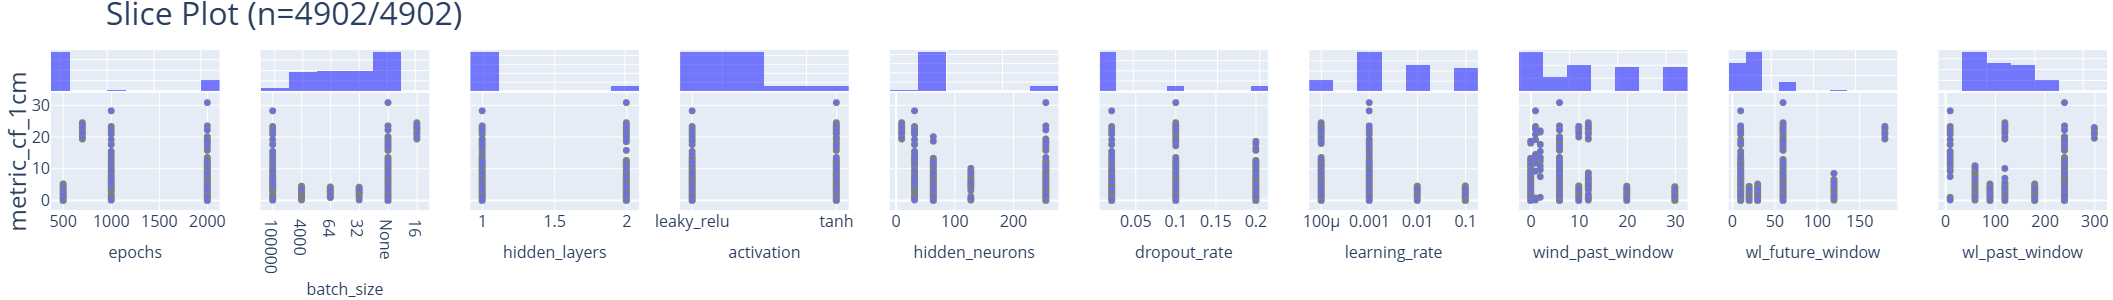

In [14]:
mk_slice_plot(converted_df, target='metric_cf_1cm').update_layout(width=1500)

C:\Users\bcolburn\AppData\Local\Temp\ipykernel_35744\301611526.py:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



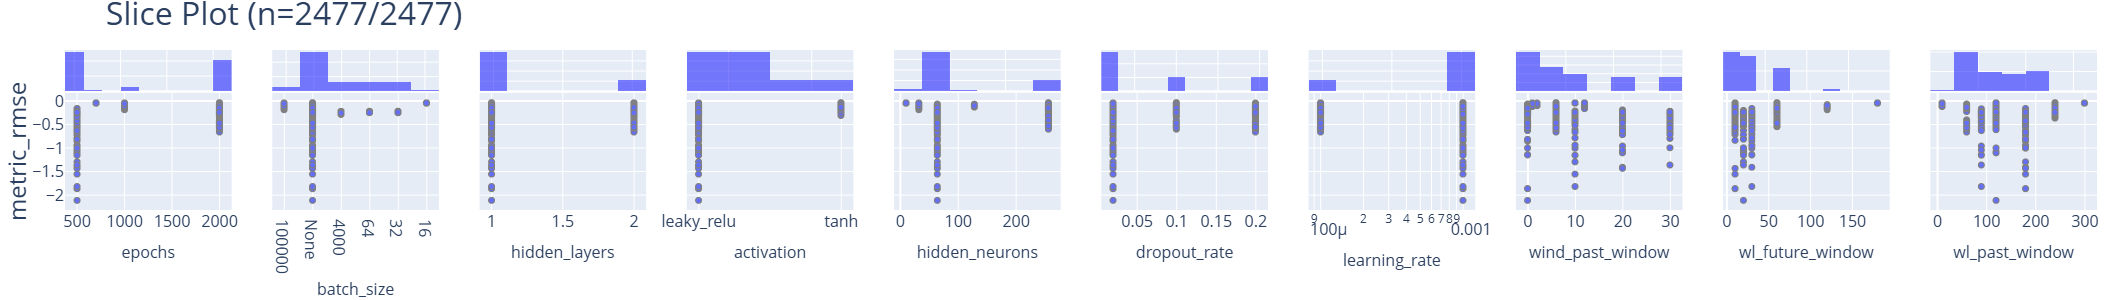

In [15]:
mk_slice_plot(converted_df.query('params_learning_rate < 0.01'), target='metric_rmse', invert=True).update_layout(width=1500)

C:\Users\bcolburn\AppData\Local\Temp\ipykernel_35744\301611526.py:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



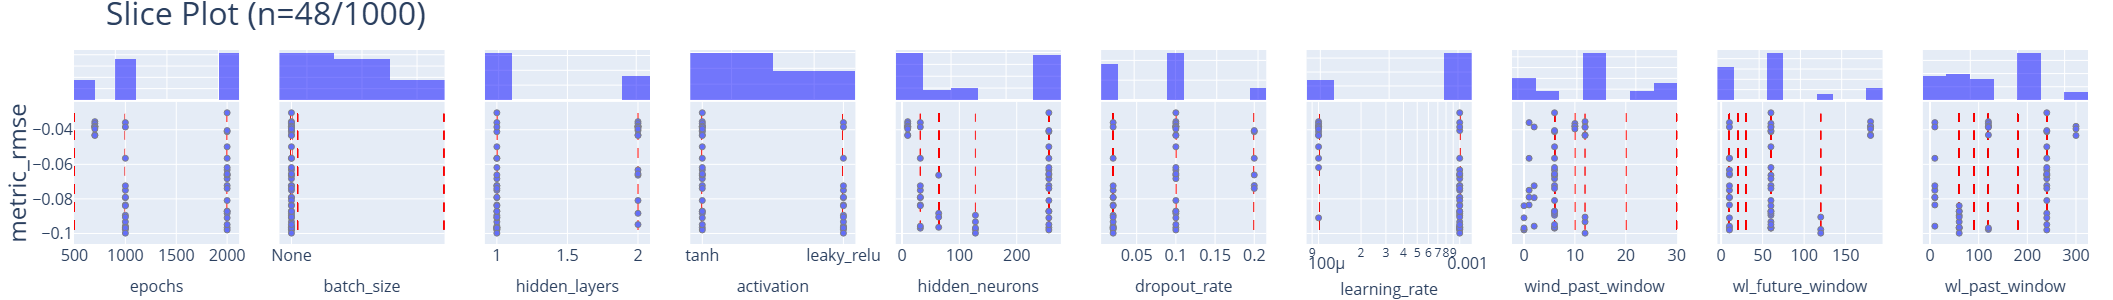

In [16]:
mk_slice_plot(converted_df.query('params_learning_rate < 0.01').sample(n=1000), target='metric_rmse', invert=True, filter=lambda df: df.query('metric_rmse < 0.1')).update_layout(width=1500)

C:\Users\bcolburn\AppData\Local\Temp\ipykernel_14052\2503072354.py:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



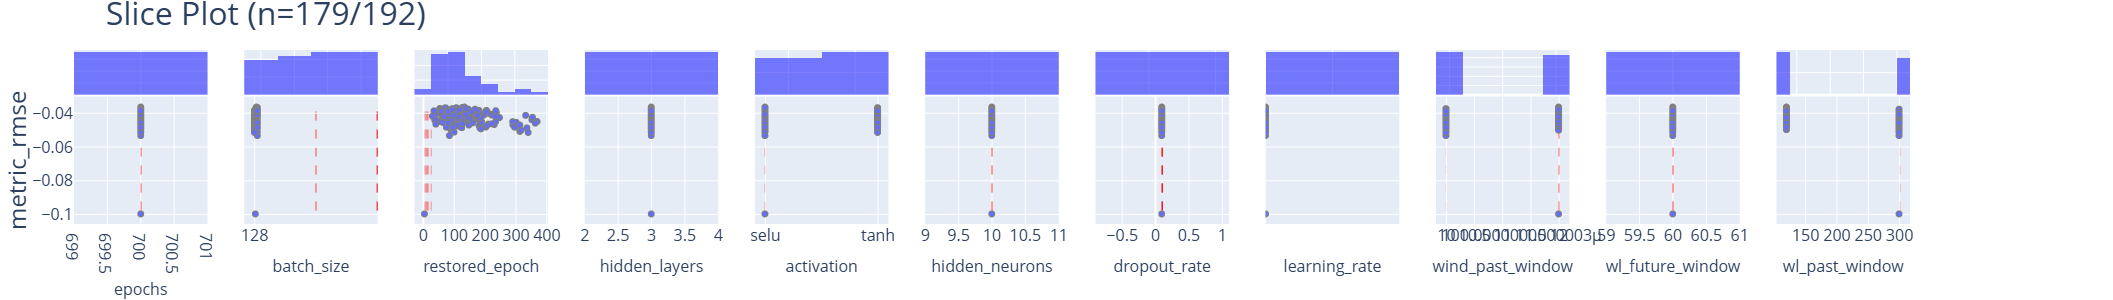

In [39]:
mk_slice_plot(converted_df.query('params_learning_rate < 0.01 and params_hidden_layers == 3 and params_wl_future_window != 180 and params_wind_past_window < 60').drop(columns=['params_hidden_neurons', 'params_learning_rate', 'params_dropout_rate', 'params_hidden_layers', 'params_epochs', 'params_wl_future_window']), target='metric_rmse', invert=True, filter=lambda df: df.query('metric_rmse < 0.1')).update_layout(width=1500)

C:\Users\bcolburn\AppData\Local\Temp\ipykernel_14052\2397178954.py:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



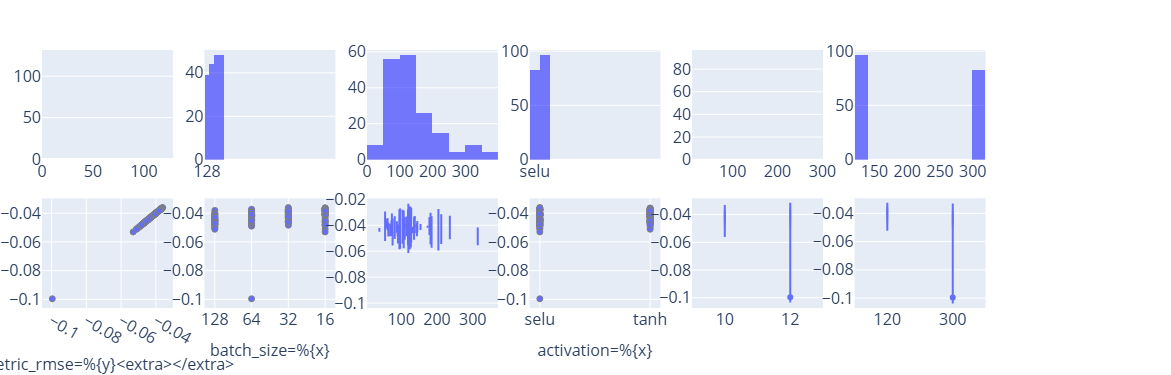

In [72]:
mk_slice_plot(converted_df.query('params_learning_rate < 0.01 and params_hidden_layers == 3 and params_wl_future_window != 180 and params_wind_past_window < 60').drop(columns=['params_hidden_neurons', 'params_learning_rate', 'params_dropout_rate', 'params_hidden_layers', 'params_epochs', 'params_wl_future_window']), target='metric_rmse', invert=True, filter=lambda df: df.query('metric_rmse < 0.1')).update_layout(width=1500)

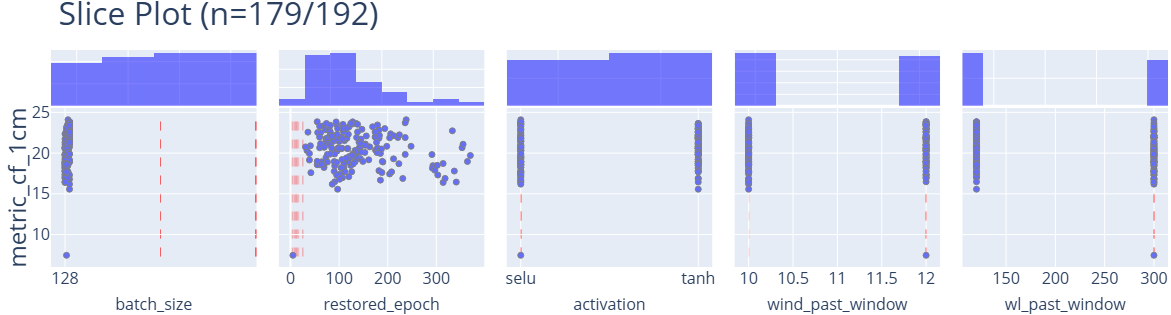

In [74]:
mk_slice_plot(converted_df.query('params_learning_rate < 0.01 and params_hidden_layers == 3 and params_wl_future_window != 180 and params_wind_past_window < 60').drop(columns=['params_hidden_neurons', 'params_learning_rate', 'params_dropout_rate', 'params_hidden_layers', 'params_epochs', 'params_wl_future_window']), target='metric_cf_1cm', filter=lambda df: df.query('metric_rmse < 0.1')).update_layout(width=1500)

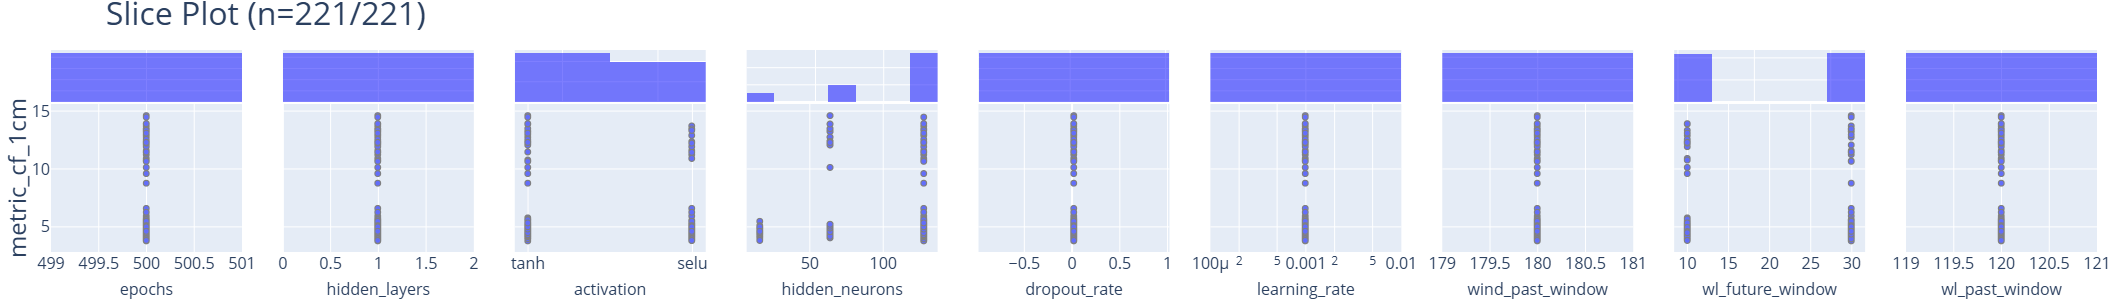

In [17]:
mk_slice_plot(converted_df.query('params_learning_rate < 0.01 and params_wind_past_window == 180'), target='metric_cf_1cm').update_layout(width=1500)

In [14]:
from IPython.display import Image

In [15]:
Image(data=mk_slice_plot(converted_df, target='metric_cf_1cm', filter=lambda df: df.query('metric_cf_1cm > 10')).update_layout(width=1500).to_image(format='png', scale=0.25))

KeyboardInterrupt: 

In [1]:
mk_slice_plot(df, target='metric_cf_1cm', filter=lambda df: df.query('metric_cf_1cm > 20')).update_layout(width=1500)

NameError: name 'mk_slice_plot' is not defined

In [7]:
# Function to filter runs based on specific criteria
# If you want to filter runs based on specific criteria, you can define the filter below
# For example, you can filter runs based on a specific metric or parameter value

def filter_runs(df, rmse=None, cf_1=None, cf_2=None, cf_5=None, cf_15=None, val_loss=None):
    """
    Filter the runs DataFrame based on threshold criteria. Pass any combination of:
    - rmse, cf_1cm, cf_2cm, cf_5cm, cf_15cm, val_loss
    """
    if rmse is not None:
        df = df[df["rmse"] <= rmse]
    if cf_1 is not None:
        df = df[df["cf_1cm"] >= cf_1]
    if cf_2 is not None:
        df = df[df["cf_2cm"] >= cf_2]
    if cf_5 is not None:
        df = df[df["cf_5cm"] >= cf_5]
    if cf_15 is not None:
        df = df[df["cf_15cm"] >= cf_15]
    if val_loss is not None:
        df = df[df["val_loss"] <= val_loss]
    return df


rmse = None
cf_1 = 10
cf_2 = None
cf_5 = None
cf_15 = None
val_losss = None


filtered_df = filter_runs(df, rmse=rmse, cf_1=cf_1, cf_2=cf_2, cf_5=cf_5, cf_15=cf_15, val_loss=val_losss)
display(filtered_df)

run_id   grid_id param_set     cf_1cm  \
10  07d49fc3874d4beea4db57522e8e1622  b7f857e4  b16fce8a  10.421654   
18  3a19c9902dea4a5f9c1df0ed7871b18d  b7f857e4  bdc46f4f  10.350853   
23  e8935e0d9e0f4ab39a0d8f54ee331a3f  b7f857e4  84b0e9d2  10.469277   
34  5fa9c12785c043eab6e339c94975574c  b7f857e4  d519b2d7  10.075424   

       cf_2cm     cf_5cm    cf_15cm      rmse  val_loss        user epochs  \
10  21.065977  48.824877  91.469097  0.086530  0.004839  emezaconde   1000   
18  20.189651  45.536440  88.467895  0.092669  0.008472  emezaconde   1000   
23  20.468762  46.486215  89.214096  0.092206  0.008224  emezaconde   1000   
34  19.820063  44.975159  87.127706  0.096982  0.005907  emezaconde   1000   

   hidden_layers  activation hidden_neurons dropout_rate wind_past_window  \
10             1  leaky_relu            128         0.02                6   
18             1  leaky_relu             64         0.02               12   
23             1  leaky_relu             64         0.02                0   
34             1  leaky_relu             32         0.02                0   

   wl_future_window wl_past_window  
10               60             60  
18              120             60  
23               60             60  
34               60             60

In [8]:
def display_top_bottom_runs(df, sort_by="rmse", top_n=50):
    """
    Display top and bottom N runs based on a selected metric.
    
    Parameters:
        df (pd.DataFrame): Run data.
        sort_by (str): Column name to sort by.
        top_n (int): Number of runs to display from top and bottom.
    """
    if sort_by not in df.columns:
        raise ValueError(f"Metric '{sort_by}' not found in DataFrame.")

    df_sorted = df.dropna(subset=[sort_by]).sort_values(by=sort_by)

    print(f"Top {top_n} runs by lowest {sort_by}:")
    display(df_sorted.head(top_n))

    print(f"\n Bottom {top_n} runs by highest {sort_by}:")
    display(df_sorted.tail(top_n))


# Display top and bottom runs based on RMSE
# You can change the `sort_by` parameter to "val_loss" or any other metric you want to analyze

display_top_bottom_runs(filtered_df, sort_by="cf_2cm")


Top 50 runs by lowest cf_2cm:


run_id   grid_id param_set     cf_1cm  \
34  5fa9c12785c043eab6e339c94975574c  b7f857e4  d519b2d7  10.075424   
18  3a19c9902dea4a5f9c1df0ed7871b18d  b7f857e4  bdc46f4f  10.350853   
23  e8935e0d9e0f4ab39a0d8f54ee331a3f  b7f857e4  84b0e9d2  10.469277   
10  07d49fc3874d4beea4db57522e8e1622  b7f857e4  b16fce8a  10.421654   

       cf_2cm     cf_5cm    cf_15cm      rmse  val_loss        user epochs  \
34  19.820063  44.975159  87.127706  0.096982  0.005907  emezaconde   1000   
18  20.189651  45.536440  88.467895  0.092669  0.008472  emezaconde   1000   
23  20.468762  46.486215  89.214096  0.092206  0.008224  emezaconde   1000   
10  21.065977  48.824877  91.469097  0.086530  0.004839  emezaconde   1000   

   hidden_layers  activation hidden_neurons dropout_rate wind_past_window  \
34             1  leaky_relu             32         0.02                0   
18             1  leaky_relu             64         0.02               12   
23             1  leaky_relu             64         0.02                0   
10             1  leaky_relu            128         0.02                6   

   wl_future_window wl_past_window  
34               60             60  
18              120             60  
23               60             60  
10               60             60


 Bottom 50 runs by highest cf_2cm:


run_id   grid_id param_set     cf_1cm  \
34  5fa9c12785c043eab6e339c94975574c  b7f857e4  d519b2d7  10.075424   
18  3a19c9902dea4a5f9c1df0ed7871b18d  b7f857e4  bdc46f4f  10.350853   
23  e8935e0d9e0f4ab39a0d8f54ee331a3f  b7f857e4  84b0e9d2  10.469277   
10  07d49fc3874d4beea4db57522e8e1622  b7f857e4  b16fce8a  10.421654   

       cf_2cm     cf_5cm    cf_15cm      rmse  val_loss        user epochs  \
34  19.820063  44.975159  87.127706  0.096982  0.005907  emezaconde   1000   
18  20.189651  45.536440  88.467895  0.092669  0.008472  emezaconde   1000   
23  20.468762  46.486215  89.214096  0.092206  0.008224  emezaconde   1000   
10  21.065977  48.824877  91.469097  0.086530  0.004839  emezaconde   1000   

   hidden_layers  activation hidden_neurons dropout_rate wind_past_window  \
34             1  leaky_relu             32         0.02                0   
18             1  leaky_relu             64         0.02               12   
23             1  leaky_relu             64         0.02                0   
10             1  leaky_relu            128         0.02                6   

   wl_future_window wl_past_window  
34               60             60  
18              120             60  
23               60             60  
10               60             60

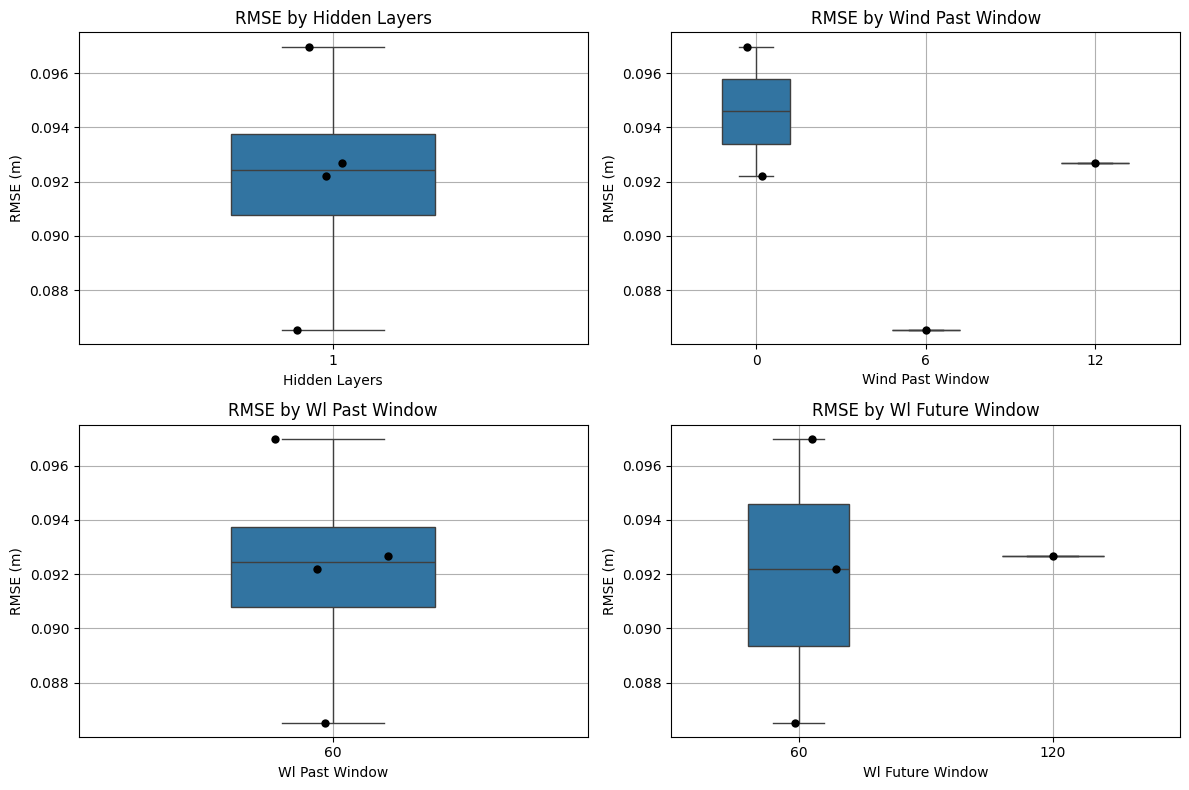

In [9]:
def plot_rmse_by_multiple_params_grid(df, param_cols, suptitle=None):
    num_plots = len(param_cols)
    ncols = 2
    nrows = (num_plots + 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 4))
    for i, param_col in enumerate(param_cols):
        ax = axes.flat[i]

        plot_df = df.copy()

        # Ensure column is numeric
        plot_df[param_col] = pd.to_numeric(plot_df[param_col], errors='coerce')

        # Get sorted unique values
        sorted_vals = sorted(plot_df[param_col].dropna().unique())

        # Convert to ordered categorical (prevents x-axis stretching)
        plot_df["param_group"] = pd.Categorical(
            plot_df[param_col],
            categories=sorted_vals,
            ordered=True
        )

        sns.boxplot(x="param_group", y="rmse", data=plot_df, width=0.4, ax=ax)
        sns.stripplot(x="param_group", y="rmse", data=plot_df, color="black", jitter=0.15, size=6, ax=ax)

        ax.set_title(f"RMSE by {param_col.replace('_', ' ').title()}")
        ax.set_xlabel(param_col.replace("_", " ").title())
        ax.set_ylabel("RMSE (m)")
        ax.grid(True)




    # Remove unused subplots
    for j in range(i + 1, len(axes.flat)):
        fig.delaxes(axes.flat[j])

    if suptitle:
        fig.suptitle(suptitle, fontsize=16, y=1.02)

    fig.tight_layout()
    plt.show()


# Plot RMSE by multiple parameters
# You can adjust the parameters you want to analyze


plot_rmse_by_multiple_params_grid(filtered_df, [
    "hidden_layers",
    "wind_past_window",
    "wl_past_window",
    "wl_future_window"
])

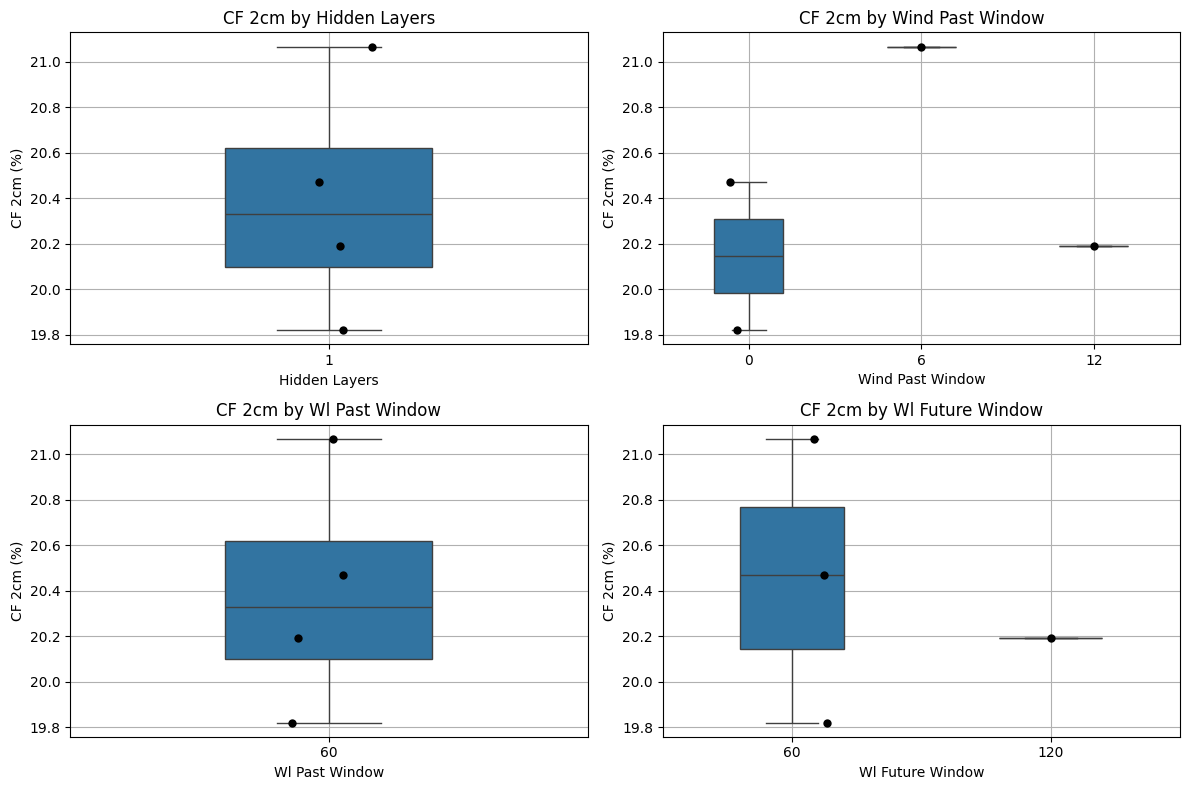

In [10]:
def plot_cf2cm_by_multiple_params_grid(df, param_cols, suptitle=None):
    num_plots = len(param_cols)
    ncols = 2
    nrows = (num_plots + 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 4))
    for i, param_col in enumerate(param_cols):
        ax = axes.flat[i]

        plot_df = df.copy()

        # Ensure column is numeric
        plot_df[param_col] = pd.to_numeric(plot_df[param_col], errors='coerce')

        # Get sorted unique values
        sorted_vals = sorted(plot_df[param_col].dropna().unique())

        # Convert to ordered categorical (prevents x-axis stretching)
        plot_df["param_group"] = pd.Categorical(
            plot_df[param_col],
            categories=sorted_vals,
            ordered=True
        )

        sns.boxplot(x="param_group", y="cf_2cm", data=plot_df, width=0.4, ax=ax)
        sns.stripplot(x="param_group", y="cf_2cm", data=plot_df, color="black", jitter=0.15, size=6, ax=ax)

        ax.set_title(f"CF 2cm by {param_col.replace('_', ' ').title()}")
        ax.set_xlabel(param_col.replace("_", " ").title())
        ax.set_ylabel("CF 2cm (%)")
        ax.grid(True)




    # Remove unused subplots
    for j in range(i + 1, len(axes.flat)):
        fig.delaxes(axes.flat[j])

    if suptitle:
        fig.suptitle(suptitle, fontsize=16, y=1.02)

    fig.tight_layout()
    plt.show()


plot_cf2cm_by_multiple_params_grid(filtered_df, [
    "hidden_layers",
    "wind_past_window",
    "wl_past_window",
    "wl_future_window"
])

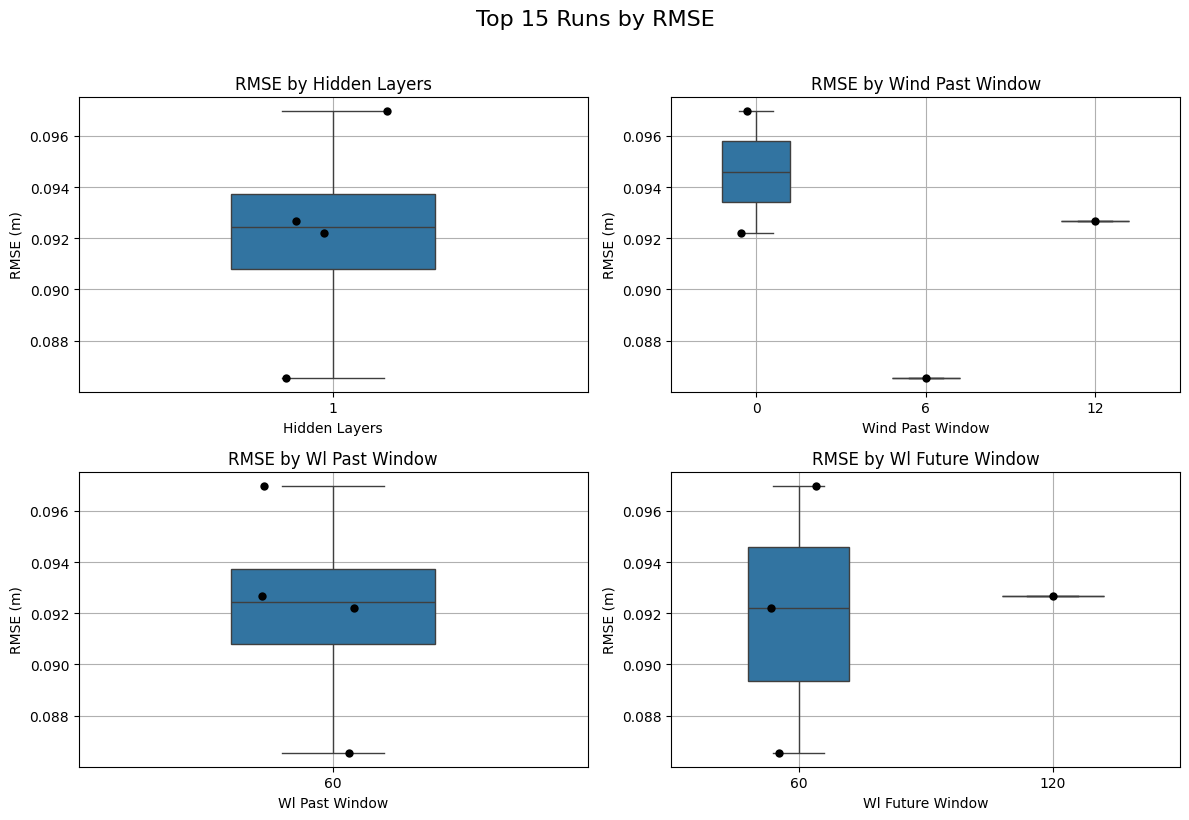

run_id   grid_id param_set     cf_1cm  \
10  07d49fc3874d4beea4db57522e8e1622  b7f857e4  b16fce8a  10.421654   
23  e8935e0d9e0f4ab39a0d8f54ee331a3f  b7f857e4  84b0e9d2  10.469277   
18  3a19c9902dea4a5f9c1df0ed7871b18d  b7f857e4  bdc46f4f  10.350853   
34  5fa9c12785c043eab6e339c94975574c  b7f857e4  d519b2d7  10.075424   

       cf_2cm     cf_5cm    cf_15cm      rmse  val_loss        user epochs  \
10  21.065977  48.824877  91.469097  0.086530  0.004839  emezaconde   1000   
23  20.468762  46.486215  89.214096  0.092206  0.008224  emezaconde   1000   
18  20.189651  45.536440  88.467895  0.092669  0.008472  emezaconde   1000   
34  19.820063  44.975159  87.127706  0.096982  0.005907  emezaconde   1000   

   hidden_layers  activation hidden_neurons dropout_rate wind_past_window  \
10             1  leaky_relu            128         0.02                6   
23             1  leaky_relu             64         0.02                0   
18             1  leaky_relu             64         0.02               12   
34             1  leaky_relu             32         0.02                0   

   wl_future_window wl_past_window  
10               60             60  
23               60             60  
18              120             60  
34               60             60

In [11]:
top15rmse_df = filtered_df.sort_values("rmse").dropna(subset=["rmse"]).head(15)

plot_rmse_by_multiple_params_grid(
    top15rmse_df,
    param_cols=[
        "hidden_layers",
        "wind_past_window",
        "wl_past_window",
        "wl_future_window"
    ],
    suptitle="Top 15 Runs by RMSE"
)
display(top15rmse_df)


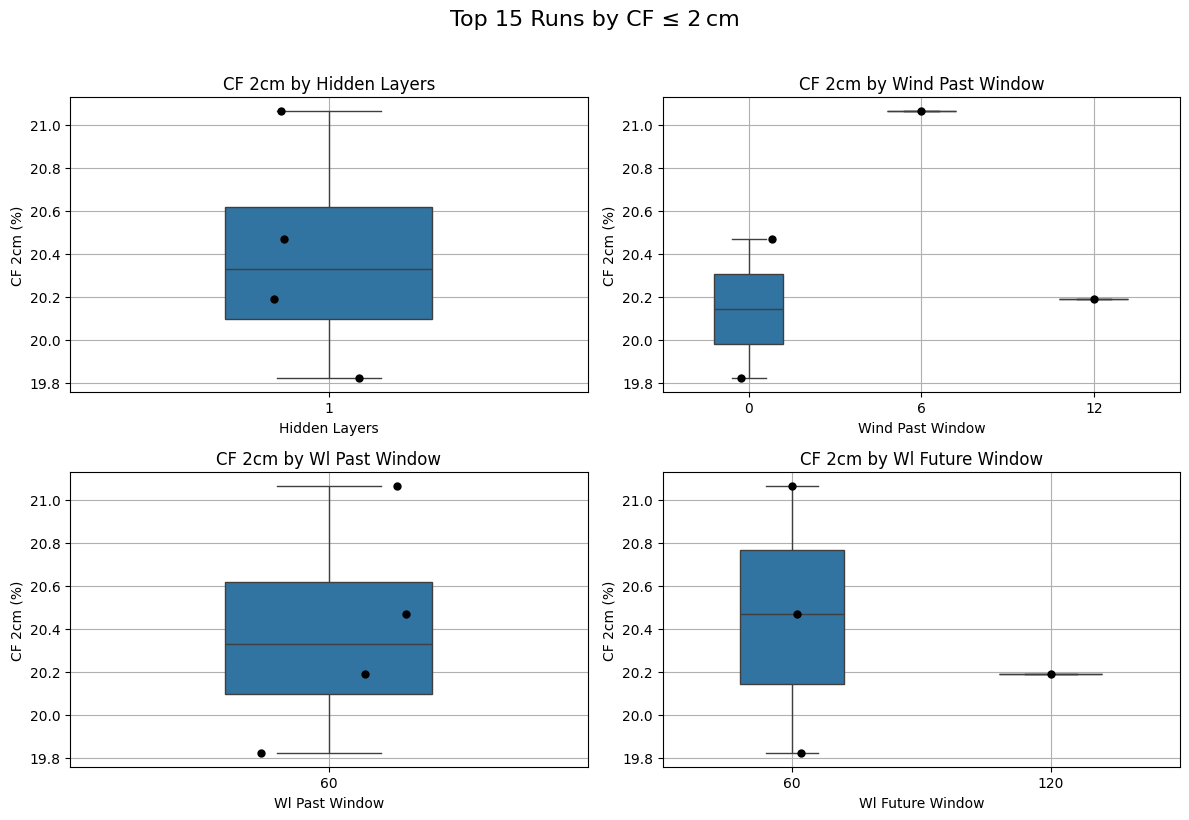

run_id   grid_id param_set     cf_1cm  \
10  07d49fc3874d4beea4db57522e8e1622  b7f857e4  b16fce8a  10.421654   
23  e8935e0d9e0f4ab39a0d8f54ee331a3f  b7f857e4  84b0e9d2  10.469277   
18  3a19c9902dea4a5f9c1df0ed7871b18d  b7f857e4  bdc46f4f  10.350853   
34  5fa9c12785c043eab6e339c94975574c  b7f857e4  d519b2d7  10.075424   

       cf_2cm     cf_5cm    cf_15cm      rmse  val_loss        user epochs  \
10  21.065977  48.824877  91.469097  0.086530  0.004839  emezaconde   1000   
23  20.468762  46.486215  89.214096  0.092206  0.008224  emezaconde   1000   
18  20.189651  45.536440  88.467895  0.092669  0.008472  emezaconde   1000   
34  19.820063  44.975159  87.127706  0.096982  0.005907  emezaconde   1000   

   hidden_layers  activation hidden_neurons dropout_rate wind_past_window  \
10             1  leaky_relu            128         0.02                6   
23             1  leaky_relu             64         0.02                0   
18             1  leaky_relu             64         0.02               12   
34             1  leaky_relu             32         0.02                0   

   wl_future_window wl_past_window  
10               60             60  
23               60             60  
18              120             60  
34               60             60

In [12]:
top15cf_df = filtered_df.sort_values("cf_2cm", ascending=False).dropna(subset=["cf_2cm"]).head(15)

plot_cf2cm_by_multiple_params_grid(
    top15cf_df,
    param_cols=[
        "hidden_layers",
        "wind_past_window",
        "wl_past_window",
        "wl_future_window"
    ],
    suptitle="Top 15 Runs by CF ≤ 2 cm"
)
display(top15cf_df)



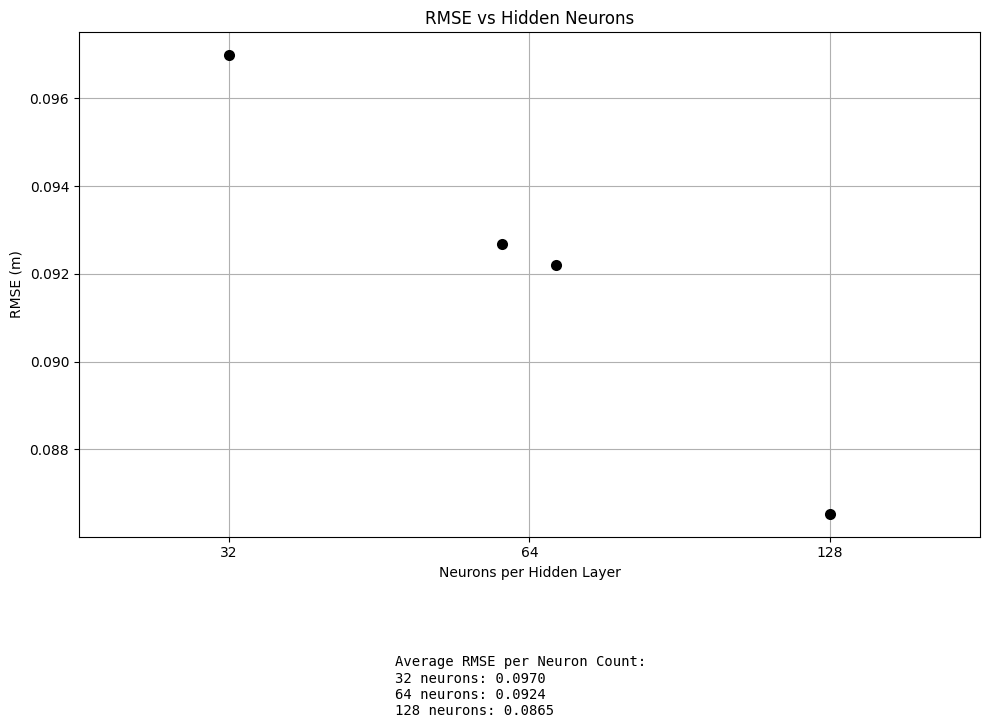

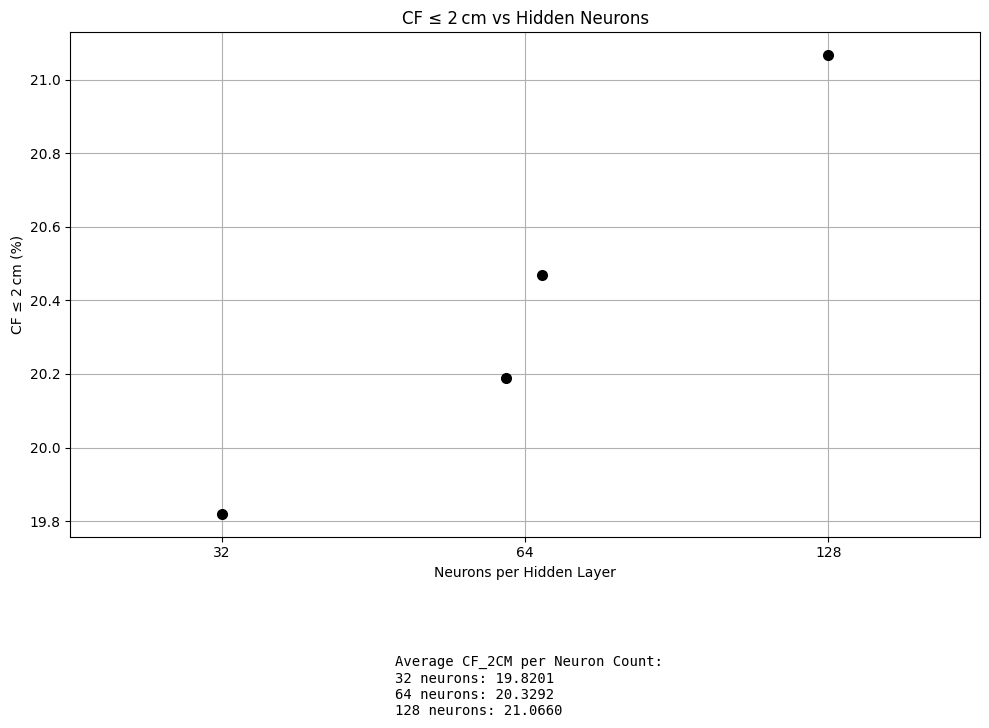

In [13]:
# Function to plot RMSE or CF ≤ 2 cm against hidden neurons
# Allows for easy comparison of how performance metrics change with neuron count
# and architecture (single vs multiple hidden layers)
# Uses seaborn for better aesthetics and matplotlib for custom text annotations

def plot_neurons_vs_metric(df, metric_col="rmse", title="RMSE vs Hidden Neurons"):
    plot_df = df.copy()

    # Ensure numeric type
    plot_df["hidden_neurons"] = pd.to_numeric(plot_df["hidden_neurons"], errors="coerce")

    # Create ordered categorical for clean plotting
    sorted_neurons = sorted(plot_df["hidden_neurons"].dropna().unique())
    plot_df["hidden_neurons_cat"] = pd.Categorical(
        plot_df["hidden_neurons"], categories=sorted_neurons, ordered=True
    )

    # Compute average per neuron count
    avg_by_neurons = (
        plot_df.groupby("hidden_neurons")[metric_col]
        .mean()
        .sort_index()
    )

    # Format summary
    summary_text = "\n".join(
        f"{int(k)} neurons: {v:.4f}" for k, v in avg_by_neurons.items()
    )

    # Plot
    plt.figure(figsize=(10, 6))
    sns.stripplot(
        x="hidden_neurons_cat", y=metric_col,
        data=plot_df, jitter=True, size=8, color="black"
    )

    plt.title(title)
    plt.xlabel("Neurons per Hidden Layer")
    plt.ylabel("RMSE (m)" if metric_col == "rmse" else "CF ≤ 2 cm (%)")
    plt.grid(True)
    plt.tight_layout()

    # Add summary text below plot
    plt.gcf().text(
        0.4, -0.2,
        f"Average {metric_col.upper()} per Neuron Count:\n{summary_text}",
        fontsize=10, family="monospace"
    )

    plt.show()




plot_neurons_vs_metric(filtered_df, metric_col="rmse", title="RMSE vs Hidden Neurons")
plot_neurons_vs_metric(filtered_df, metric_col="cf_2cm", title="CF ≤ 2 cm vs Hidden Neurons")